# HIV Model

In [31]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

print('If this cell runs successfully, it produces no output other than this message.')

If this cell runs successfully, it produces no output other than this message.


In [32]:
state = State(r=200, l=0, e=0, v=100) 

,values
r,200
l,0
e,0
v,100


In [33]:
system = System(gamma = 1.36,
                tau = 0.2,
                mu = 1.36e-3,
                beta = 0.00027,
                alpha = 3.6e-2,
                delta = 0.33,
                pi = 100,
                sigma = 2,
                rho = 0.1,
                t0 = 0,
                t_end = 60,
                dt = 0.1)

,values
gamma,1.36000
tau,0.20000
mu,0.00136
beta,0.00027
alpha,0.03600
delta,0.33000
pi,100.00000
sigma,2.00000
rho,0.10000
t0,0.00000


In [34]:
def update_func(state, t, system):
    R, L, E, V = state
    
    drdt = ((gamma * tau) - (mu * R) - (beta * R * V))
    dldt = ((rho * beta * R * V) - (mu * L)- (alpha * L))
    dedt = (((1-rho) * beta * R * V) + (alpha * L) - (delta * E))
    dvdt = ((pi * E) - (sigma * V))
 
    R += drdt * dt
    L += dldt * dt
    E += dedt * dt
    V += dvdt * dt

    return State(r=R, l=L, e=E, v=V)

In [35]:
print(state)

r    200
l      0
e      0
v    100
dtype: int64


In [36]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=state.index)
    frame.row[t0] = state
    
    for t in linrange(t0, t_end, dt):
        frame.row[t + dt] = update_func(frame.row[t], t, system)
    
    return frame

In [37]:
update_func(state, 1, system)

,values
r,199.460
l,0.054
e,0.486
v,80.000


In [38]:
results = run_simulation(system, update_func)

,r,l,e,v
0.0,200,0,0,100
0.1,199.46,0.054,0.486,80
0.2,199.029,0.0968816,0.857907,68.86
0.3,198.659,0.133524,1.16298,63.6671
0.4,198.318,0.167174,1.43243,62.5635
0.5,197.983,0.20005,1.68726,64.3751
0.6,197.639,0.233715,1.94201,68.3727
0.7,197.275,0.269327,2.20714,74.1183
0.8,196.88,0.307799,2.49058,81.366
0.9,196.448,0.349902,2.79877,89.9985


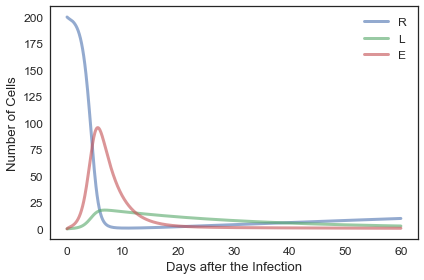

In [39]:
plot(results.r, label='R')
plot(results.l, label='L')
plot(results.e, label='E')
decorate(xlabel='Days after the Infection',
         ylabel='Number of Cells')

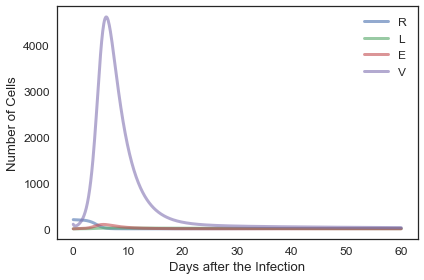

In [40]:
plot(results.r, label='R')
plot(results.l, label='L')
plot(results.e, label='E')
plot(results.v, label='V')
decorate(xlabel='Days after the Infection',
         ylabel='Number of Cells')